In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
df=pd.read_csv("/content/train (1).csv")

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print("coloum",df.columns)
print("shape",df.shape)

coloum Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
shape (2000, 21)


In [ ]:
corr=df.corr()
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [ ]:
y=df['price_range'].values
x=df.drop(['price_range'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming x contains the features and y contains the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)


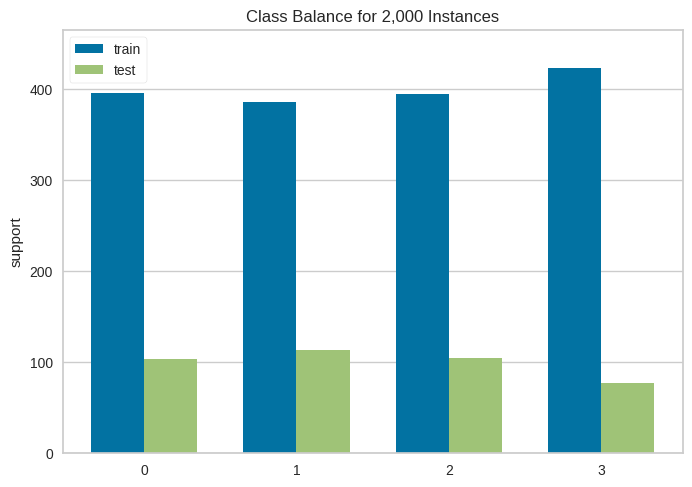

<Axes: title={'center': 'Class Balance for 2,000 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance
visualizer =ClassBalance(labels=[0,1,2,3])
visualizer.fit(y_train,y_test)
visualizer.poof()

In [ ]:
from sklearn.svm import SVC
svm1=SVC(random_state=45)
svm1.fit(x_train,y_train)
y_pred=svm1.predict(x_test)
print("train accuracy",svm1.score(x_train,y_train))
print("test accuracy",svm1.score(x_test,y_test))
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,y_pred)
print("model accuracy score with default hyperparameter:{0:0.4f}".format(acc1))


train accuracy 0.951875
test accuracy 0.96
model accuracy score with default hyperparameter:0.9600


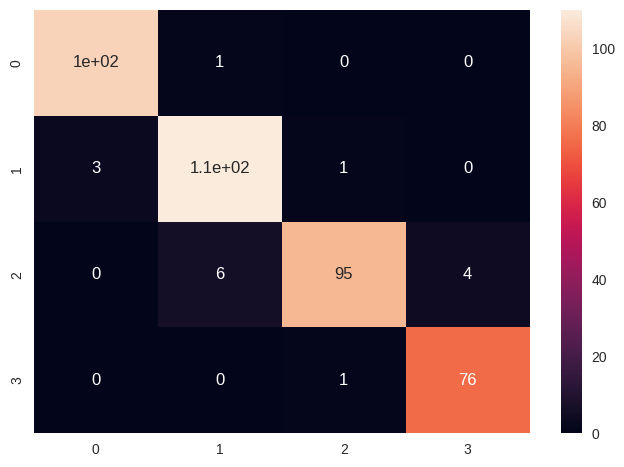

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif

In [ ]:
accuracy_list_train=[]

[6 7 7 6 7 5 5 6 6 5 7 5 7 6 6 5 7 7 7 6 6 7 5 6 6 6 5 7 5 5 5 5 5 6 5 7 7
 5 5 6 5 5 7 7 5 6 5 5 5 5 5 5 6 7 6 7 6 7 7 5 6 6 6 7 6 7 7 5 7 5 5 7 4 4
 5 6 7 7 7 6 5 6 7 6 7 7 5 6 6 6 7 3 5 7 6 7 7 6 5 7 5 7 7 5 7 6 5 7 7 7 7
 6 7 5 5 7 7 7 5 5 6 7 6 5 7 7 7 6 7 5 7 5 6 7 6 5 6 5 7 5 7 5 4 6 7 5 5 6
 5 5 7 7 7 7 7 4 7 6 7 3 5 5 6 3 6 7 5 7 5 7 5 7 7 5 7 7 5 7 7 7 6 6 7 7 5
 6 7 5 5 3 5 6 7 7 5 5 7 7 6 7 6 4 7 6 6 7 8 7 5 7 5 7 7 7 4 6 6 6 6 7 5 5
 6 7 7 6 6 7 7 5 6 5 7 6 5 7 7 5 5 5 6 4 7 6 7 6 6 5 6 5 5 7 6 6 7 5 7 5 6
 6 6 5 6 4 7 7 5 5 6 6 5 6 6 7 5 6 6 6 7 5 7 5 7 5 5 7 8 6 5 6 7 7 6 5 7 6
 6 6 5 6 5 5 3 7 7 5 3 6 7 7 6 5 6 6 6 7 7 7 5 7 7 6 7 7 6 6 7 5 7 5 6 7 6
 6 6 7 7 7 7 5 6 6 5 5 5 7 7 5 5 5 7 7 7 5 7 6 6 7 7 6 5 5 6 5 6 5 5 5 6 6
 5 6 6 5 7 6 7 5 5 6 7 7 5 7 6 6 6 6 5 5 5 7 5 5 5 5 4 7 7 6 4 6 7 7 6 7 7
 5 7 7 5 6 7 6 5 6 4 6 4 6 7 5 5 7 7 7 5 7 6 6 7 7 6 7 7 5 6 6 5 7 5 6 6 6
 5 7 7 7 5 5 5 5 6 7 7 5 5 7 5 6 6 7 6 6 7 7 7 6 7 5 5 7 7 5 5 6 5 6 7 5 6
 5 5 5 5 7 6 6 5 3 7 5 7 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


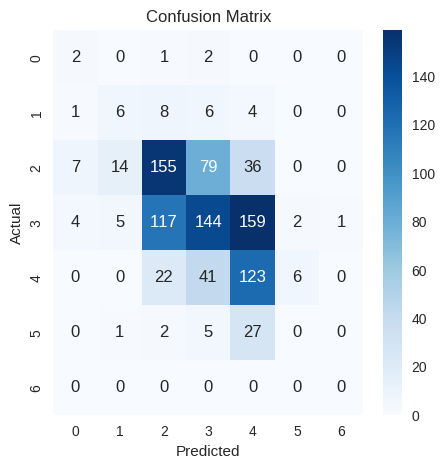

In [ ]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df=pd.read_csv(url,sep=';')
df

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

X=df.drop('quality',axis=1)
Y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

NB=GaussianNB()
NB.fit(x_train,y_train)
y_pred=NB.predict(x_test)
print(y_pred)
print(y_test)
print('Classification Report :\n',classification_report(y_test,y_pred))


cm=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d',cmap=plt.cm.Blues,cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



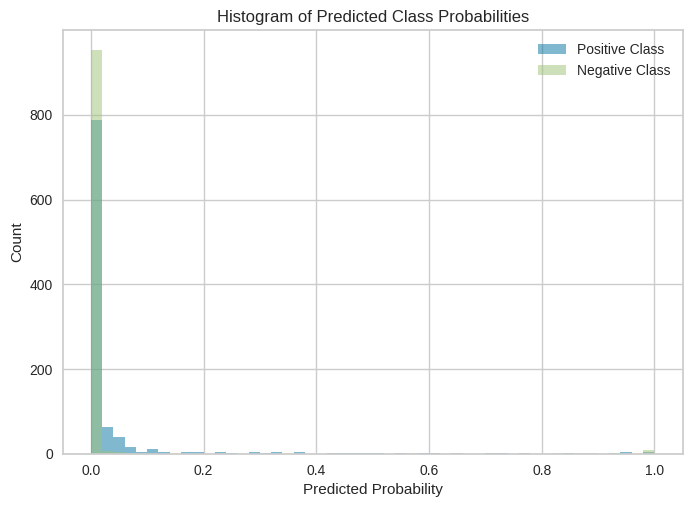

In [ ]:
proba=NB.predict_proba(x_test)
plt.hist(proba[:,1],bins=50,alpha=0.5,label='Positive Class')
plt.hist(proba[:,0],bins=50,alpha=0.5,label='Negative Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Histogram of Predicted Class Probabilities')
plt.legend()
plt.show()